### Model and Evaluation
We will try to start with a simple model and then move onto Ensemble models and other complex models. We will use Accuracy as our metric.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [20]:
df = pd.read_csv('final_dataset.csv')
df = df.reset_index()
df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
df = df.dropna()
df.head()

,index,Match Runs,Total Runs,Ave,Career SR,HS,Opposition,Ground,m1,m2,m3,m4,m5,Records
0,0,19.0,28.0,14.16,73.91,136,7,88,0.0,0.0,36.0,10.0,20.0,-10
1,1,31.0,23.0,16.57,82.26,136,7,113,0.0,36.0,10.0,20.0,19.0,-10
2,2,36.0,44.0,19.00,93.25,136,20,102,36.0,10.0,20.0,19.0,31.0,-10
3,3,53.0,46.0,22.77,100.49,157,20,124,10.0,20.0,19.0,31.0,36.0,-10
4,4,30.0,145.0,23.50,100.85,157,20,92,20.0,19.0,31.0,36.0,53.0,0


### Two ways ahead
We can just go ahead with regression for the final output which may or may not be the best or we can try classification with dense classes from 0-100 and sparse there on. We can start by MinMax scaling everything expect our y and categorical variables. 

In [21]:
scaler = MinMaxScaler()
df[['Total Runs', 'HS', 'm1', 'm2', 'm3', 'm4', 'm5', 'Records']] = scaler.fit_transform(df[['Total Runs', 'HS', 'm1', 'm2', 'm3', 'm4', 'm5', 'Records']])
df.head()

,index,Match Runs,Total Runs,Ave,Career SR,HS,Opposition,Ground,m1,m2,m3,m4,m5,Records
0,0,19.0,0.011863,14.16,73.91,0.609865,7,88,0.000000,0.000000,0.136364,0.037879,0.075758,0.016827
1,1,31.0,0.011592,16.57,82.26,0.609865,7,113,0.000000,0.136364,0.037879,0.075758,0.071970,0.016827
2,2,36.0,0.012730,19.00,93.25,0.609865,20,102,0.136364,0.037879,0.075758,0.071970,0.117424,0.016827
3,3,53.0,0.012838,22.77,100.49,0.704036,20,124,0.037879,0.075758,0.071970,0.117424,0.136364,0.016827
4,4,30.0,0.018201,23.50,100.85,0.704036,20,92,0.075758,0.071970,0.117424,0.136364,0.200758,0.021635


We will start with these classes 10 classes between 0-100, 5 classes for 100-200 and 1 for 200+. We can then try and change these. 

In [22]:
df.loc[(df['Match Runs'] >= 200), 'class'] = 16
df.loc[(df['Match Runs'] < 200) & (df['Match Runs'] >= 180), 'class'] = 15
df.loc[(df['Match Runs'] < 180) & (df['Match Runs'] >= 160), 'class'] = 14
df.loc[(df['Match Runs'] < 160) & (df['Match Runs'] >= 140), 'class'] = 13
df.loc[(df['Match Runs'] < 140) & (df['Match Runs'] >= 120), 'class'] = 12
df.loc[(df['Match Runs'] < 120) & (df['Match Runs'] >= 100), 'class'] = 11
df.loc[(df['Match Runs'] < 100) & (df['Match Runs'] >= 90), 'class'] = 10
df.loc[(df['Match Runs'] < 90) & (df['Match Runs'] >= 80), 'class'] = 9
df.loc[(df['Match Runs'] < 80) & (df['Match Runs'] >= 70), 'class'] = 8
df.loc[(df['Match Runs'] < 70) & (df['Match Runs'] >= 60), 'class'] = 7
df.loc[(df['Match Runs'] < 60) & (df['Match Runs'] >= 50), 'class'] = 6
df.loc[(df['Match Runs'] < 50) & (df['Match Runs'] >= 40), 'class'] = 5
df.loc[(df['Match Runs'] < 40) & (df['Match Runs'] >= 30), 'class'] = 4
df.loc[(df['Match Runs'] < 30) & (df['Match Runs'] >= 20), 'class'] = 3
df.loc[(df['Match Runs'] < 20) & (df['Match Runs'] >= 10), 'class'] = 2
df.loc[(df['Match Runs'] < 10), 'class'] = 1

In [23]:
df['class'].astype(int)

0        2
1        4
2        4
3        6
4        4
        ..
16856    7
16857    3
16858    1
16859    2
16860    1
Name: class, Length: 16822, dtype: int64

In [24]:
df.drop(['index'], axis=1, inplace=True)
df.to_csv('multi_dataset.csv', index=False)

In [25]:
df = df.sample(frac=0.7)
y = df['class']
df.drop(['Match Runs', 'class'], inplace=True, axis=1)
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle=True)

In [78]:
from sklearn.tree import DecisionTreeClassifier

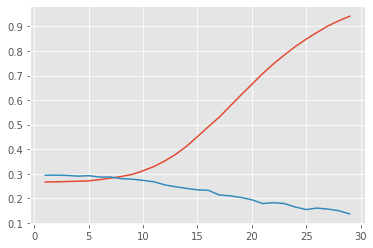

In [79]:
test_scores = []
train_scores = []
for i in range(1, 30):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    test_scores.append(model.score(X_test, y_test))
    train_scores.append(model.score(X_train, y_train))
plt.plot(range(1, 30), train_scores, label='Training Accuracy')
plt.plot(range(1, 30), test_scores, label='Testing Accuracy')
plt.show()

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
test_scores = []
train_scores = []
for i in range(1, 30):
    model = RandomForestClassifier(max_depth=i)
    model.fit(X_train, y_train)
    test_scores.append(model.score(X_test, y_test))
    train_scores.append(model.score(X_train, y_train))
plt.plot(range(1, 30), train_scores, label='Training Accuracy')
plt.plot(range(1, 30), test_scores, label='Testing Accuracy')
plt.show()

In [84]:
param_grid = { 
    'n_estimators': np.linspace(1, 1000, 20, dtype=int),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.linspace(1, 50, 10, dtype=int),
    'criterion' :['gini', 'entropy']
}

In [85]:
from sklearn.model_selection import GridSearchCV

In [88]:
model = RandomForestClassifier(verbose=2)
grid = GridSearchCV(model, param_grid, cv=5, n_jobs=4, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


In [2]:
import joblib 
model = joblib.load('best.pkl')

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
model = RandomForestClassifier(**model)

In [14]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, n_estimators=501)

In [15]:
model.score(X_test, y_test), model.score(X_train, y_train)

(0.27748068924539515, 0.3414360261576062)

In [18]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=11, n_estimators=501)>

In [27]:
model2 = RandomForestClassifier(max_depth=10, n_estimators=1000, max_features='auto', criterion='entropy')
model2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=1000)

In [28]:
model2.score(X_test, y_test), model2.score(X_train, y_train)

(0.2756981580510992, 0.3518065922451945)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
model3 = GradientBoostingClassifier(n_estimators=1000, max_depth=10, max_features='auto', learning_rate=0.1)
model3.fit(X_train, y_train)
model3.score(X_test, y_test), model3.score(X_train, y_train)

(0.24955436720142601, 1.0)

In [31]:
model4 = GradientBoostingClassifier(n_estimators=1000, max_depth=10, max_features='auto', learning_rate=0.01, verbose=2, n_iter_no_change=20, validation_fraction=0.1)
model4.fit(X_train, y_train)
model4.score(X_test, y_test), model4.score(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           2.1531           16.48m
         2           2.1352           17.10m
         3           2.1191           17.40m
         4           2.1054           17.46m
         5           2.0919           17.86m
         6           2.0796           18.32m
         7           2.0674           18.62m
         8           2.0554           18.87m
         9           2.0447           19.10m
        10           2.0336           19.19m
        11           2.0230           19.30m
        12           2.0122           19.36m
        13           2.0015           19.44m
        14           1.9914           19.52m
        15           1.9816           19.61m
        16           1.9715           19.75m
        17           1.9615           19.82m
        18           1.9517           19.91m
        19           1.9419           19.97m
        20           1.9327           20.02m
        21           1.9232           20.06m
        2

(0.2640067911714771, 0.5041993016891573)